In [1]:
import numpy as np
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional  as F

## 1. Create Data

In [4]:
import seaborn as sns

In [5]:
iris = sns.load_dataset("iris")

In [6]:
iris.shape

(150, 5)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Converting to tensor 

In [9]:
arr = iris[iris.columns[0:4]].values

#### Predictiors or Independent features

In [10]:
data = torch.tensor(arr ,dtype = torch.float )
data[:5]

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])

#### Labels

In [11]:
# labels = np.zeros(shape = len(iris))

In [12]:
labels = torch.zeros(size = ( len(iris), )  ,dtype = torch.long)

In [13]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])

In [14]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [15]:
labels[iris["species"] == "versicolor"] = 1

In [16]:
labels[iris["species"] == "virginica"]  = 2

    setosa       0
    versicolor   1
    virginica    2

In [17]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

## 3. Separate the data into DataLoaders

In [18]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

In [19]:
# scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.2)


# convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)


# finally, translate into dataloader objects
#int(train_data.tensors[0].shape[0]/4) -- Hard-coding is better to avoid huge batches!
batchsize    = 16 
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0]) 

In [20]:
for X,y in train_loader:
    print(X.shape,y.shape)

torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([8, 4]) torch.Size([8])


In [21]:
for X,y in test_loader:
    print(X.shape,y.shape)

torch.Size([30, 4]) torch.Size([30])


## 4. Custom function for Model Creation

In [22]:
def ANNIRIS(L2lambda , LR):

    # model architecture
    ANNiris = nn.Sequential(
                            nn.Linear(4,64),   # input layer
                            nn.ReLU(),         # activation unit
                            nn.Linear(64,64),  # hidden layer
                            nn.ReLU(),         # activation unit
                            nn.Linear(64,3),   # output units
                           )

    # loss function
    lossfunc = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(),lr=LR,weight_decay=L2lambda)

    return ANNiris,lossfunc,optimizer

## 5. Custom function for Model Training

In [23]:
def trainTheModel(Model ,lossfunc ,optimizer ,train_loader,test_loader,epochs):

    # initialize accuracies as empties
    trainAcc = []
    testAcc  = []
    losses   = []

    # loop over epochs
    for epochi in range(epochs):

        # need to toggle train mode here??

        # loop over training data batches
        batchAcc  = []
        batchLoss = []
    
        for X,y in train_loader:

            # forward pass and loss
            yHat_train = Model(X)
            loss = lossfunc(yHat_train,y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # compute training accuracy just for this batch
            batchAcc.append( 100*torch.mean((torch.argmax(yHat_train,axis=1) == y).float()).item() )
            batchLoss.append( loss.item() )

        # end of batch loop...

        # now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.mean(batchAcc) )
        losses.append( np.mean(batchLoss) )

        # test accuracy (not needed because we're not doing Drop-out)
        Model.eval()

        # extract X,y from test dataloader
        X,y = next(iter(test_loader)) 

        predlabels = torch.argmax( Model(X),axis=1 )
        testAcc.append( 100*torch.mean((predlabels == y).float()).item() )

        # (not needed because we're not doing Drop-out)
        Model.train() 

    # function output
    return trainAcc,testAcc,losses


## 6. Model training

In [30]:
# create a model
L2lambda = .01
LR = 0.01
ANNiris,lossfunc,optimizer = ANNIRIS(L2lambda = L2lambda  , LR = LR)  

# train the model
trainAcc,testAcc,losses = trainTheModel(Model = ANNiris ,
                                        lossfunc = lossfunc,
                                        optimizer = optimizer,
                                        train_loader = train_loader ,
                                        test_loader = test_loader,
                                        epochs = 1000)


## 7. Results Visualization

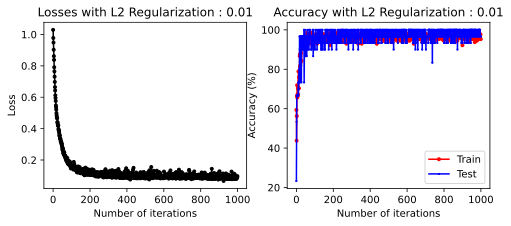

In [32]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(8,3) ,dpi = 130)


ax[0].plot(losses,'k.-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Number of iterations')
ax[0].set_title(f'Losses with L2 Regularization : {L2lambda}')

ax[1].plot(trainAcc,'r.-')
ax[1].plot(testAcc,'bs-' ,markersize = 1)
ax[1].set_title(f'Accuracy with L2 Regularization : {L2lambda}')
ax[1].set_xlabel('Number of iterations')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(['Train','Test'])

plt.show()

In [26]:
# create a 1D smoothing filter
def smooth(x,k):
    return np.convolve(x,np.ones(k)/k,mode='same')


## 8. Experiment

In [27]:
# range of L2 regularization amounts
l2lambdas = np.linspace(0,.1,10)
numepochs = 1000
LR = 0.01

# initialize output results matrices
accuracyResultsTrain = np.zeros((numepochs,len(l2lambdas)))
accuracyResultsTest  = np.zeros((numepochs,len(l2lambdas)))


# loop over batch sizes
for li in range(len(l2lambdas)):

    # Create Model
    ANNiris,lossfunc,optimizer = ANNIRIS(L2lambda = l2lambdas[li] , LR =LR)
    
    # Train the model
    trainAcc,testAcc,losses = trainTheModel(Model = ANNiris ,
                                            lossfunc = lossfunc,
                                            optimizer = optimizer,
                                            train_loader = train_loader ,
                                            test_loader = test_loader,
                                            epochs = numepochs)
    # store data
    accuracyResultsTrain[:,li] = smooth(trainAcc,10)
    accuracyResultsTest[:,li]  = smooth(testAcc,10)

## 9. Results Visualization

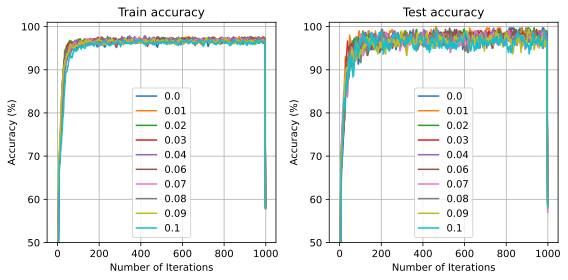

In [28]:
fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].plot(accuracyResultsTrain)
ax[0].set_title('Train accuracy')

ax[1].plot(accuracyResultsTest)
ax[1].set_title('Test accuracy')

# make the legend easier to read
leglabels = [np.round(i,2) for i in l2lambdas]

# common features
for i in range(2):
    
    ax[i].legend(leglabels)
    ax[i].set_xlabel('Number of Iterations')
    ax[i].set_ylabel('Accuracy (%)')
    ax[i].set_ylim([50,101])
    
    ax[i].grid()
    fig.tight_layout()

plt.show()

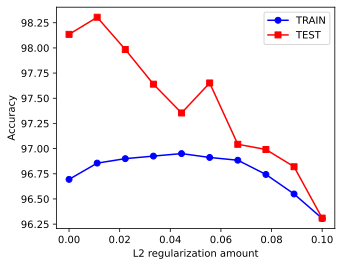

In [29]:
# show average accuracy by L2 rate

# average only some epochs
epoch_range = [500,950]

plt.figure(figsize = (5,4))
plt.plot(l2lambdas,
         np.mean(accuracyResultsTrain[epoch_range[0]:epoch_range[1],:],axis=0),
         'bo-',label='TRAIN')

plt.plot(l2lambdas,
         np.mean(accuracyResultsTest[epoch_range[0]:epoch_range[1],:],axis=0),
         'rs-',label='TEST')

plt.xlabel('L2 regularization amount')
plt.ylabel('Accuracy')
plt.legend()

plt.show()